In [ ]:
# Intstall PyTorch and download data
!pip3 install torch torchvision
!pip install pytorch-lightning --q
!wget -c http://ufldl.stanford.edu/housenumbers/train_32x32.mat http://ufldl.stanford.edu/housenumbers/test_32x32.mat

     |████████████████████████████████| 924 kB 4.2 MB/s 
     |████████████████████████████████| 123 kB 52.7 MB/s 
     |████████████████████████████████| 282 kB 46.4 MB/s 
     |████████████████████████████████| 636 kB 34.1 MB/s 
     |████████████████████████████████| 829 kB 35.2 MB/s 
     |████████████████████████████████| 1.3 MB 32.9 MB/s 
     |████████████████████████████████| 142 kB 52.2 MB/s 
     |████████████████████████████████| 294 kB 51.6 MB/s 
--2021-09-28 11:47:28--  http://ufldl.stanford.edu/housenumbers/train_32x32.mat
Resolving ufldl.stanford.edu (ufldl.stanford.edu)... 171.64.68.10
Connecting to ufldl.stanford.edu (ufldl.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182040794 (174M) [text/plain]
Saving to: ‘train_32x32.mat’

train_32x32.mat     100%[===================>] 173.61M  18.5MB/s    in 14s     

2021-09-28 11:47:42 (12.1 MB/s) - ‘train_32x32.mat’ saved [182040794/182040794]

--2021-09-28 11:47:42--  http

In [ ]:
!pip install "ray[tune]" 
!pip install "pytorch-lightning>=1.0" 
!pip install "pytorch-lightning-bolts>=0.2.5"
import torch
from torch.nn import functional as F
import os
from ray.tune.integration.pytorch_lightning import TuneReportCallback

In [ ]:
from collections import namedtuple

import matplotlib.pyplot as plt
import numpy as np
import PIL
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler

from torchvision import transforms

# !pip install pytorch_lightning.callbacks
import torch
import pytorch_lightning as pl
import os
import numpy as np

from torch import nn
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader, random_split
from torchvision import datasets, transforms

from pytorch_lightning.core.lightning import LightningModule


import torchvision.datasets as dset
from torch.utils.data.sampler import SubsetRandomSampler, Sampler
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from pytorch_lightning.callbacks.model_checkpoint import ModelCheckpoint
from pytorch_lightning.callbacks import lr_monitor, LearningRateMonitor

# rrrr

In [ ]:
data_train = dset.SVHN('./', split='train', transform=transforms.Compose([
                                                                          transforms.ToTensor(), 
                                                                          transforms.Normalize(mean=[0.43,0.44,0.47], std=[0.20,0.20,0.20])]))
data_test = dset.SVHN('./', split='test', transform=transforms.Compose([
                                                                        transforms.ToTensor(), 
                                                                        transforms.Normalize(mean=[0.43,0.44,0.47], std=[0.20,0.20,0.20])]))

In [ ]:
batch_size = 64
data_size = data_train.data.shape[0]

indices = list(range(data_size))
np.random.shuffle(indices)

thresh = int(np.floor(0.2 * data_size))
train_indices, val_indices = indices[thresh:], indices[:thresh]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)

train_loader = DataLoader(data_train, batch_size=batch_size, sampler=train_sampler)
val_loader = DataLoader(data_train, batch_size=batch_size, sampler=val_sampler)

In [ ]:
tfs = transforms.Compose([
    transforms.ColorJitter(hue=.20, saturation=.20),
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10, resample=PIL.Image.BILINEAR),
    transforms.GaussianBlur(3,(0.1,2.0)),
    transforms.RandomPerspective(0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.43,0.44,0.47],
                       std=[0.20,0.20,0.20])                           
])

# Create augmented train dataset
data_aug_train = dset.SVHN('./', 
                       transform=tfs
                      )

train_aug_loader = torch.utils.data.DataLoader(data_aug_train, batch_size=batch_size, 
                                           sampler=train_sampler)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1231: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


In [ ]:
train_aug_loader.dataset.data.shape

(73257, 3, 32, 32)

In [ ]:
class Flattener(nn.Module):
    def forward(self, x):
        batch_size, *_ = x.shape
        return x.view(batch_size, -1)

# Визуализация и попытка запихнуть обработку данных в класс

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1231: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


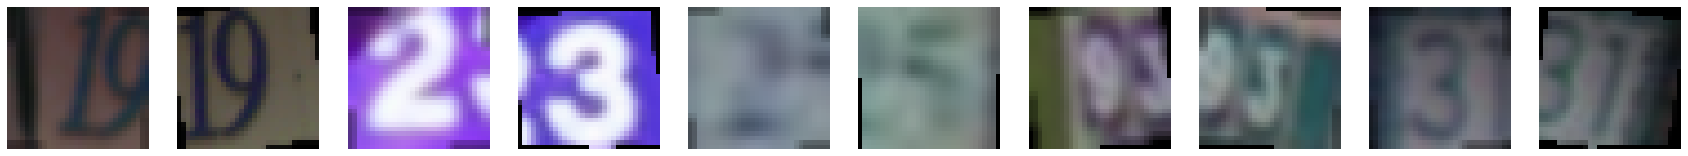

In [ ]:
import albumentations as A
# TODO: Visualize some augmented images!
# hint: you can create new datasets and loaders to accomplish this

# Based on the visualizations, should we keep all the augmentations?

tfs = transforms.Compose([
    transforms.ColorJitter(hue=.20, saturation=.20),
    # transforms.RandomHorizontalFlip(),
    # transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10, resample=PIL.Image.BILINEAR),
    transforms.GaussianBlur(3,(0.1,2.0)),
    transforms.RandomPerspective(0.1) 
])

transform = A.Compose([
    # A.ColorJitter(),
    # A.RandomCrop(width=256, height=256),
    A.Rotate(limit=15),
    A.HorizontalFlip(p=0.2),
    A.RandomBrightnessContrast(p=0.2),
    A.GaussNoise()])

data_aug_vis = dset.SVHN('./', 
                       transform=tfs
                      )

plt.figure(figsize=(30, 3))

for i, (x, y) in enumerate(data_aug_vis):
    if i == 10:
        break
    plt.subplot(1, 10, i+1)
    plt.grid(False)
    # img_tensor = torch.tensor(x.data[0].shape, dtype=torch.float)
    # print(img_tensor.shape)
    plt.imshow(x)
    plt.axis('off')

In [ ]:
class LightningMashaDataModule(pl.LightningDataModule):
  def __init__(self, batch_size):
      self.batch_size = batch_size
  
  def prepare_data(self):
      dset.SVHN('./', split='train',download=True)
      dset.SVHN('./', split='test', download=True)
  
  def setup(self):
      transform=transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=[0.43,0.44,0.47], std=[0.20,0.20,0.20])])
      data_train = dset.SVHN('./', split='train', transform = transform)
      self.data_test = dset.SVHN('./', split='test', transform = transform)
      data_size = data_train.data.shape[0]
      
      self.data_train, self.data_val = random_split(data_train, [data_size - int(np.floor(0.2 * data_size)), int(np.floor(0.2 * data_size))]) 
      # data_test = dset.SVHN('./', split='test', transform = transform)  

  def train_dataloader(self):
      train_loader = DataLoader(self.data_train, batch_size=self.batch_size)
      return train_loader

  def val_dataloader(self):
      val_loader = DataLoader(self.data_train, batch_size=self.batch_size)
      return val_loader

  def test_dataloader(self):
      test_loader = DataLoader(self.data_test, batch_size=self.batch_size)
      return test_loader

# Конец попытки

In [ ]:
class Flattener(nn.Module):
    def forward(self, x):
        batch_size, *_ = x.shape
        return x.view(batch_size, -1)
class LightningMashaClassifier(pl.LightningModule):

  def __init__(self, lr_rate):
    super().__init__()
    self.nn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(4,stride=2),
            nn.Conv2d(6, 16, 5, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(4,stride=2),
            nn.ReLU(inplace=True), 
            Flattener(),
            nn.Linear(5*16*5, 120),
            nn.ReLU(inplace=True), 
            nn.Linear(120, 84),
            nn.ReLU(inplace=True), 
            nn.Linear(84, 10)
          )
    self.lr_rate = lr_rate
    self.loss_func = nn.CrossEntropyLoss()
    

  def forward(self, x):
    return self.nn_model(x)

  def cross_entropy_loss(self, logits, labels):
    # return F.nll_loss(logits, labels)
    # return nn.cross_entropy_loss(logits,labels)
    return self.loss_func(logits, labels)

  def training_step(self, train_batch, batch_idx):
      x, y = train_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      self.log('train_loss', loss, prog_bar=True)
      logs = {'train_loss': loss}
      return {'loss': loss, 'log': logs}
      # self.log('train_loss', loss)
      # return loss

  def validation_step(self, val_batch, batch_idx):
      x, y = val_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      return {'val_loss': loss}
      # self.log('val_loss', loss)
      # return loss

  def test_step(self, val_batch, batch_idx):
      x, y = val_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      self.log('test_loss', loss, prog_bar=True)
      pred = self.nn_model(x)
      pred = torch.argmax(pred, dim=1)
      accuracy = torch.sum(y == pred).item() / (len(y) * 1.0)
      self.log('test_acc', torch.tensor(accuracy), prog_bar=True)
      return {'test_loss': loss}
      # self.log('test_loss', loss)
      # return loss

  def validation_epoch_end(self, outputs):
      avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
      tensorboard_logs = {'val_loss': avg_loss}
      return {'avg_val_loss': avg_loss, 'log': tensorboard_logs, 'progress_bar': tensorboard_logs}

  def test_epoch_end(self, outputs):
      avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
      tensorboard_logs = {'test_loss': avg_loss}
      return {'avg_test_loss': avg_loss, 'log': tensorboard_logs, 'progress_bar': tensorboard_logs}

  def configure_optimizers(self):
      # optimizer = torch.optim.Adam(self.parameters(), lr=self.lr_rate)
      optimizer = optim.SGD(self.nn_model.parameters(), lr=1e-1, weight_decay=1e-4)
      # lr_scheduler = {'scheduler': torch.optim.lr_scheduler.StepLR(optimizer,1,0.6),
      #                 'name': 'StepLR'}
      return optimizer#], [lr_scheduler]
 

In [ ]:
model = LightningMashaClassifier(lr_rate=1e-1)

trainer = pl.Trainer(max_epochs=5, gpus=1) #gpus=1

trainer.fit(model, train_dataloaders = train_aug_loader, val_dataloaders = val_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | nn_model  | Sequential       | 2.1 M 
1 | loss_func | CrossEntropyLoss | 0     
-----------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.284     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

ValueError: ignored

In [ ]:
test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size)

trainer.test(test_dataloaders=test_loader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:679: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': 0.8187230825424194, 'test_loss': 0.633269727230072}
--------------------------------------------------------------------------------


[{'test_acc': 0.8187230825424194, 'test_loss': 0.633269727230072}]

# Подбор гиперпараметров

In [ ]:
# The key hyperparameters we're going to tune are learning speed, annealing rate and regularization
# We also encourage you to try different optimizers as well

Hyperparams = namedtuple("Hyperparams", ['learning_rate', 'anneal_epochs', 'reg'])
RunResult = namedtuple("RunResult", ['model', 'train_history', 'val_history', 'final_val_accuracy'])

learning_rates = [1e0, 1e-1, 1e-2, 1e-3, 1e-4]
anneal_coeff = 0.2
anneal_epochs = [1, 5, 10, 15, 20, 50]
reg = [1e-3, 1e-4, 1e-5, 1e-7]

batch_size = 64
epoch_num = 10

# Record all the runs here
# Key should be Hyperparams and values should be RunResult
run_record = {} 

# Use grid search or random search and record all runs in run_record dictionnary 
# Important: perform search in logarithmic space!

# TODO: Your code here!

In [ ]:
class Flattener(nn.Module):
    def forward(self, x):
        batch_size, *_ = x.shape
        return x.view(batch_size, -1)
class LightningMashaClassifier(pl.LightningModule):

  def __init__(self, lr_rate):
    super().__init__()
    self.nn_model = nn.Sequential(
            nn.Conv2d(3, 128, 3, stride = 2,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, 3, padding = 1,stride = 2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),     
            Flattener(),
            nn.Linear(256*6*6, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10)
          )
    
    # nn.Conv2d(3, 64, 3, padding=1),
    #         nn.ReLU(inplace=True),
    #         nn.MaxPool2d(4),
    #         nn.Conv2d(64, 64, 3, padding=1),
    #         nn.ReLU(inplace=True),
    #         nn.MaxPool2d(4),    
    #         Flattener(),
    #         nn.Linear(64*2*2, 10),
    
    self.lr_rate = lr_rate
    self.loss_func = nn.CrossEntropyLoss()
    

  def forward(self, x):
    return self.nn_model(x)

  def cross_entropy_loss(self, logits, labels):
    # return F.nll_loss(logits, labels)
    # return nn.cross_entropy_loss(logits,labels)
    return self.loss_func(logits, labels)

  def training_step(self, train_batch, batch_idx):
      x, y = train_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      self.log('train_loss', loss, prog_bar=True)
      logs = {'train_loss': loss}
      return {'loss': loss, 'log': logs}
      # self.log('train_loss', loss)
      # return loss

  def validation_step(self, val_batch, batch_idx):
      x, y = val_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      return {'val_loss': loss}
      # self.log('val_loss', loss)
      # return loss

  def test_step(self, val_batch, batch_idx):
      x, y = val_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      self.log('test_loss', loss, prog_bar=True)
      pred = self.nn_model(x)
      pred = torch.argmax(pred, dim=1)
      accuracy = torch.sum(y == pred).item() / (len(y) * 1.0)
      self.log('test_acc', torch.tensor(accuracy), prog_bar=True)
      return {'test_loss': loss}
      # self.log('test_loss', loss)
      # return loss

  def validation_epoch_end(self, outputs):
      avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
      tensorboard_logs = {'val_loss': avg_loss}
      return {'avg_val_loss': avg_loss, 'log': tensorboard_logs, 'progress_bar': tensorboard_logs}

  def test_epoch_end(self, outputs):
      avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
      tensorboard_logs = {'test_loss': avg_loss}
      return {'avg_test_loss': avg_loss, 'log': tensorboard_logs, 'progress_bar': tensorboard_logs}

  def configure_optimizers(self):
      # optimizer = torch.optim.Adam(self.parameters(), lr=self.lr_rate)
      optimizer = optim.SGD(self.nn_model.parameters(), lr=1e-1, weight_decay=1e-4)
      # lr_scheduler = {'scheduler': torch.optim.lr_scheduler.StepLR(optimizer,1,0.6),
      #                 'name': 'StepLR'}
      return optimizer
 

In [ ]:
model = LightningMashaClassifier(lr_rate=1e-1)

trainer = pl.Trainer(max_epochs=10, gpus=1) #gpus=1b,

trainer.fit(model, train_dataloaders = train_aug_loader, val_dataloaders = val_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | nn_model  | Sequential       | 2.1 M 
1 | loss_func | CrossEntropyLoss | 0     
-----------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.284     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size)

trainer.test(test_dataloaders=test_loader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:679: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': 0.859634280204773, 'test_loss': 0.43950486183166504}
--------------------------------------------------------------------------------


[{'test_acc': 0.859634280204773, 'test_loss': 0.43950486183166504}]

# После 86

In [ ]:
import albumentations as A
tfs = transforms.Compose([
    transforms.ColorJitter(hue=.50, saturation=.50),
    transforms.RandomRotation(50, resample=PIL.Image.BILINEAR),
    # transforms.RandomVerticalFlip(),
    A.RandomBrightnessContrast(p=0.2),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.43,0.44,0.47],
                       std=[0.20,0.20,0.20])                           
])

# Create augmented train dataset
data_aug_train = dset.SVHN('./', 
                       transform=tfs
                      )

train_aug_loader = torch.utils.data.DataLoader(data_aug_train, batch_size=batch_size, 
                                           sampler=train_sampler)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:1231: UserWarning: Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead
  "Argument resample is deprecated and will be removed since v0.10.0. Please, use interpolation instead"


In [ ]:
class Flattener(nn.Module):
    def forward(self, x):
        batch_size, *_ = x.shape
        return x.view(batch_size, -1)
class LightningMashaClassifier(pl.LightningModule):

  def __init__(self, lr_rate):
    super().__init__()
    self.nn_model = nn.Sequential(
            nn.Conv2d(3, 32, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(32),
            
            nn.Conv2d(32, 32, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Dropout2d(p=0.3),

            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(64),

            nn.Conv2d(64, 64, 3, padding = 1,stride = 2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Dropout2d(p=0.3),

            nn.Conv2d(64, 128, 3, padding = 1,stride = 2),
            nn.ReLU(inplace=True),
            nn.BatchNorm2d(128),

            nn.Conv2d(128, 128, 3, padding = 1,stride = 2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(2),
            nn.Dropout2d(p=0.3),
 
            Flattener(),
            nn.Linear(128*4*4, 10),
            nn.ReLU(inplace=True),
            nn.Dropout2d(p=0.3),
          )
    self.nn_model = nn.Sequential(
    nn.Conv2d(3, 128, 3, stride = 2,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, 3, padding = 1,stride = 2),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, 3),
            nn.ReLU(inplace=True),     
            Flattener(),
            nn.Linear(256*6*6, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 10)
          )
    self.lr_rate = lr_rate
    self.loss_func = nn.CrossEntropyLoss()
    

  def forward(self, x):
    return self.nn_model(x)

  def cross_entropy_loss(self, logits, labels):
    # return F.nll_loss(logits, labels)
    # return nn.cross_entropy_loss(logits,labels)
    return self.loss_func(logits, labels)

  def training_step(self, train_batch, batch_idx):
      x, y = train_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      self.log('train_loss', loss, prog_bar=True)
      logs = {'train_loss': loss}
      return {'loss': loss, 'log': logs}
      # self.log('train_loss', loss)
      # return loss

  def validation_step(self, val_batch, batch_idx):
      x, y = val_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      return {'val_loss': loss}
      # self.log('val_loss', loss)
      # return loss

  def test_step(self, val_batch, batch_idx):
      x, y = val_batch
      logits = self.forward(x)
      loss = self.cross_entropy_loss(logits, y)
      self.log('test_loss', loss, prog_bar=True)
      pred = self.nn_model(x)
      pred = torch.argmax(pred, dim=1)
      accuracy = torch.sum(y == pred).item() / (len(y) * 1.0)
      self.log('test_acc', torch.tensor(accuracy), prog_bar=True)
      return {'test_loss': loss}
      # self.log('test_loss', loss)
      # return loss

  def validation_epoch_end(self, outputs):
      avg_loss = torch.stack([x['val_loss'] for x in outputs]).mean()
      tensorboard_logs = {'val_loss': avg_loss}
      return {'avg_val_loss': avg_loss, 'log': tensorboard_logs, 'progress_bar': tensorboard_logs}

  def test_epoch_end(self, outputs):
      avg_loss = torch.stack([x['test_loss'] for x in outputs]).mean()
      tensorboard_logs = {'test_loss': avg_loss}
      return {'avg_test_loss': avg_loss, 'log': tensorboard_logs, 'progress_bar': tensorboard_logs}

  def configure_optimizers(self):
      optimizer = torch.optim.Adam(self.parameters(), lr=self.lr_rate,amsgrad=True)
      # optimizer = optim.SGD(self.nn_model.parameters(), lr=1e-1, weight_decay=1e-4)
      # lr_scheduler = {'scheduler': torch.optim.lr_scheduler.StepLR(optimizer,1,0.6),
      #                 'name': 'StepLR'}
      return optimizer
 

In [ ]:
model = LightningMashaClassifier(lr_rate=1e-4)

trainer = pl.Trainer(max_epochs=10, gpus=1) #gpus=1b,

trainer.fit(model, train_dataloaders = train_aug_loader, val_dataloaders = val_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name      | Type             | Params
-----------------------------------------------
0 | nn_model  | Sequential       | 2.1 M 
1 | loss_func | CrossEntropyLoss | 0     
-----------------------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.284     Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

In [ ]:
test_loader = torch.utils.data.DataLoader(data_test, batch_size=batch_size)

trainer.test(test_dataloaders=test_loader)

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/trainer/trainer.py:679: LightningDeprecationWarning: `trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6. Use `trainer.test(dataloaders)` instead.
  "`trainer.test(test_dataloaders)` is deprecated in v1.4 and will be removed in v1.6."
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Testing: 0it [00:00, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 TEST RESULTS
{'test_acc': 0.9125691652297974, 'test_loss': 0.30504530668258667}
--------------------------------------------------------------------------------


[{'test_acc': 0.9125691652297974, 'test_loss': 0.30504530668258667}]